<a href="https://colab.research.google.com/github/HebertMachado/data_science/blob/master/Projeto_COVID_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Panorama do COVID-19 no Brasil

COVID-19 é uma doença infecciosa causada por recém-descoberto coronavírus.

Transmitido principalmente por meio de gotículas provenientes de tosses ou espirros de pessoas infectadas, a gravidade dos sintomas varia muito de pessoa para pessoa.

Fato é, não se sabe muita coisa a respeito do COVID-19. Estudos estão sendo realizados no mundo todo, porém os resultados ainda não são conclusivos e definitivos.
Até o presente momento, observa-se que cerca de 80% dos casos confirmados são assintomáticos e rápidos. A maioria das pessoas que se encaixam nesse grupo, se recupera sem nenhuma sequela.


No entanto, 15% das pessoas terão infecções graves e precisarão de oxigênio. O restante das pessoas, que representam 5%, serão classificadas como infecções muito graves e precisarão de ventilação assistida, por meio de respiradores mecânicos em ambiente hospitalar.

Com o objetivo de elevar a consciência situacional a respeito do COVID-19 no Brasil, irei realizar uma análise sobre os dados públicos da doença.

# Obtenção dos Dados

Os Dados do COVID-19 usados nesse projetos foi da '[by Our World in Data](https://github.com/owid/covid-19-data/tree/master/public/data)'.

Porém, temos muita dificuldade na obtenção dos dados, pois, tem vários orgãos como Prefeituras, universidades, estados e ministérios informandos dados, com isso não sabemos se os dados estão corretos e atualizados.
Então obtive os dados da [Our World in Data](https://ourworldindata.org/coronavirus).

# Dicionário de Variáveis

Nesse dataframe temos variáveis como:

*   **iso_code**  = ISO 3166-1 alfa-3 - códigos de países com três letras
*   **continent** = Continente da localização geográfica
*   **location** = Localização geográfica
*   **date** = Data da observação
*   **total_cases** = Total de casos confirmados de COVID-19
*   **new_cases** = Novos casos confirmados de COVID-19
*   **total_deaths** = Total de mortes atribuídas ao COVID-19
*   **new_deaths** =  Novas mortes atribuídas ao COVID-19
*   **total_cases_per_million** = Total de casos confirmados de COVID-19 por 1.000.000 de pessoas
*   **new_cases_per_million**  = Novos casos confirmados de COVID-19 por 1.000.000 de pessoas
*  **total_deaths_per_million** = Total de mortes atribuídas ao COVID-19 por 1.000.000 de pessoas
*   **new_deaths_per_million** = Novas mortes atribuídas ao COVID-19 por 1.000.000 de pessoas
*   **total_tests** = Total de testes para COVID-19
*   **new_tests** = Novos testes para COVID-19
*   **new_tests_smoothed** =  Novos testes para COVID-19 (suavizado por 7 dias). Para países que não relatam dados de teste diariamente, assumimos que o teste mudou igualmente diariamente em qualquer período em que nenhum dado foi relatado. Isso produz uma série completa de números diários, que são calculados como média em uma janela de 7 dias consecutivos
*   **total_tests_per_thousand** = Total de testes para COVID-19 por 1.000 pessoas
*   **new_tests_per_thousand** = Novos testes para COVID-19 por 1.000 pessoas
*   **new_tests_smoothed_per_thousand** = Novos testes para COVID-19 (7 dias suavizados) por 1.000 pessoas
*   **tests_units** = Unidades usadas pelo local para relatar seus dados de teste
*   **stringency_index** = Índice de Estresse da Resposta do Governo: medida composta baseada em 9 indicadores de resposta, incluindo fechamento de escolas, fechamento de locais de trabalho e proibições de viagens, redimensionada para um valor de 0 a 100 (100 = resposta mais estrita)
*   **population** = População em 2020
*   **population_density** = Número de pessoas divididas por área terrestre, medida em quilômetros quadrados, no ano mais recente disponível
*   **median_age** = Idade média da população, projeção da ONU para 2020
*   **aged_65_older** = Proporção da população com 65 anos ou mais, ano mais recente disponível 
*   **aged_70_older** = Percentagem da população com 70 anos ou mais em 2015
*   **gdp_per_capita** = Produto interno bruto com paridade do poder de compra (dólares internacionais constantes de 2011), último ano disponível
*   **extreme_poverty** = Percentagem da população que vive em extrema pobreza, último ano disponível desde 2010
*   **cvd_death_rate** = Taxa de mortalidade por doenças cardiovasculares em 2017
*   **diabetes_prevalence** = Prevalência de diabetes (% da população entre 20 e 79 anos) em 2017
*   **female_smokers** = Percentagem de mulheres que fumam, último ano disponível
*   **male_smokers** = Proporção de homens que fumam, último ano disponível
*   **handwashing_facilities** = Percentagem da população com instalações básicas de lavagem das mãos nas instalações, último ano disponível
*   **hospital_beds_per_thousands** = Camas de hospital por 1.000 pessoas, último ano disponível desde 2010
*   **life_expectancy** = Expectativa de vida no nascimento em 2019




# Importando os dados do COVID-19 e Análise Exploratória dos Dados

Vamos importar od dados que obtivemos no Our World in Data, para fazermos a análise dos dados.

In [18]:
# importar as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style()
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# importar o dataset COVID-19 para um DataaFrame
df = pd.read_csv("https://raw.githubusercontent.com/HebertMachado/dados/master/owid-covid-data.csv?token=AP44C64GD25ZI6YEUA3F37K7BS4KO")

Parte importante da nossa análise, é descobrir o tamanho do dataset que estamos encarando.

Vamos verificar:


In [19]:
#  verificando as dimensões
print( 'A dimensão do DataSet:','\nVariável:', df.shape[0],"\n" 'Entradas:', df.shape[1])
# verificando as primeiras entradas
df.head()


A dimensão do DataSet: 
Variável: 29801 
Entradas: 34


,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83


In [20]:
# extrair os nomes das colunas
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'total_deaths', 'new_deaths', 'total_cases_per_million',
       'new_cases_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'tests_units',
       'stringency_index', 'population', 'population_density', 'median_age',
       'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cvd_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy'],
      dtype='object')

Agora precisamos ver os tipos da variáveis, pois, alguns estão do tipo errado.

In [21]:
# verificando o tipo das variáveis
df.dtypes

iso_code                            object
continent                           object
location                            object
date                                object
total_cases                        float64
new_cases                          float64
total_deaths                       float64
new_deaths                         float64
total_cases_per_million            float64
new_cases_per_million              float64
total_deaths_per_million           float64
new_deaths_per_million             float64
total_tests                        float64
new_tests                          float64
total_tests_per_thousand           float64
new_tests_per_thousand             float64
new_tests_smoothed                 float64
new_tests_smoothed_per_thousand    float64
tests_units                         object
stringency_index                   float64
population                         float64
population_density                 float64
median_age                         float64
aged_65_old

Outro detalhe importante é a verificação em relação aos dados ausentes. Lembre-se de se atentar não para quais dados estão faltando, mas também o motivo deles estarem faltando.

Para isso, é importante verificar a fonte dos dados, entender a coleta deles, verificar a aleatoriedade dessa ausência, etc.


In [22]:
# verificando dados ausentes

round((df.isnull().sum() / df.shape[0]).sort_values(ascending=False),2)


new_tests                          0.71
new_tests_per_thousand             0.71
total_tests_per_thousand           0.69
total_tests                        0.69
new_tests_smoothed_per_thousand    0.67
new_tests_smoothed                 0.67
tests_units                        0.64
handwashing_facilities             0.59
extreme_poverty                    0.40
male_smokers                       0.29
female_smokers                     0.28
stringency_index                   0.20
hospital_beds_per_thousand         0.18
aged_65_older                      0.11
gdp_per_capita                     0.11
aged_70_older                      0.10
median_age                         0.10
cvd_death_rate                     0.10
diabetes_prevalence                0.07
population_density                 0.04
life_expectancy                    0.01
new_deaths_per_million             0.01
total_deaths_per_million           0.01
new_cases_per_million              0.01
total_cases_per_million            0.01


Como vimos ao analisar o tipo das variáveis, verificamos que a coluna `date` não está em formato datetime. Para que possamos explorar essa variável ao máximo, vamos transformá-la para o formato datetime.

In [23]:
# transformando a coluna data em datetime
df.date = pd.to_datetime(df.date)

Após alterar o formato, vamos verificar qual a data mais recente do nosso dataset. Com essa informação, vamos verificar o país líder em casos naquele momento.

In [24]:
# verificando a data mais recente do dataset
df.date.max()

Timestamp('2020-07-12 00:00:00')

In [25]:
#total de casos
df.loc[df.date =='2020-07-12'].sort_values(by="total_cases",ascending=False)

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
29736,OWID_WRL,NaN,World,2020-07-12,12698995.0,222967.0,564924.0,4926.0,1629.163,28.605,72.474,0.632,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.070,8.51,6.434,34.635,60.13,2.705,72.58
28356,USA,North America,United States,2020-07-12,3247684.0,63051.0,134814.0,717.0,9811.656,190.485,407.290,2.166,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.310026e+08,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.100,24.600,NaN,2.770,78.86
4020,BRA,South America,Brazil,2020-07-12,1839850.0,39023.0,71469.0,1071.0,8655.698,183.586,336.231,5.039,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.125594e+08,25.040,33.5,8.552,5.060,14103.452,3.4,177.961,8.11,10.100,17.900,NaN,2.200,75.88
12634,IND,Asia,India,2020-07-12,849553.0,28637.0,22674.0,551.0,615.616,20.751,16.430,0.399,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.280,10.39,1.900,20.600,59.55,0.530,69.66
22502,RUS,Europe,Russia,2020-07-12,720547.0,6611.0,11205.0,188.0,4937.470,45.301,76.781,1.288,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.459345e+08,8.823,39.6,14.178,9.393,24765.954,0.1,431.297,6.18,23.400,58.300,NaN,8.050,72.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18446,MSR,North America,Montserrat,2020-07-12,12.0,0.0,1.0,0.0,2400.480,0.000,200.040,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.999000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.16
21102,PNG,Oceania,Papua New Guinea,2020-07-12,11.0,0.0,0.0,0.0,1.229,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.947027e+06,18.220,22.6,3.808,2.142,3823.194,NaN,561.494,17.65,23.500,48.800,NaN,NaN,64.50
4128,VGB,North America,British Virgin Islands,2020-07-12,8.0,0.0,1.0,0.0,264.577,0.000,33.072,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.023700e+04,207.973,NaN,NaN,NaN,NaN,NaN,NaN,13.67,NaN,NaN,NaN,NaN,79.07
3600,BES,North America,Bonaire Sint Eustatius and Saba,2020-07-12,7.0,0.0,0.0,0.0,266.962,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.622100e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.79


Pudemos verificar que os países líderes em casos aos 12 de Julho de 2020 eram:

  

*   Estados Unidos - 3.247.684 	 casos
*    Brasil - 1.839.850 casos
*   Índia - 849.553 casos

    

Agora, vamos verificar os casos de morte.


In [26]:
 # total de mortes
 df.loc[df.date=='2020-07-12'].sort_values(by="total_deaths", ascending= False)

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
29736,OWID_WRL,NaN,World,2020-07-12,12698995.0,222967.0,564924.0,4926.0,1629.163,28.605,72.474,0.632,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.070,8.51,6.434,34.635,60.13,2.705,72.58
28356,USA,North America,United States,2020-07-12,3247684.0,63051.0,134814.0,717.0,9811.656,190.485,407.290,2.166,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.310026e+08,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.100,24.600,NaN,2.770,78.86
4020,BRA,South America,Brazil,2020-07-12,1839850.0,39023.0,71469.0,1071.0,8655.698,183.586,336.231,5.039,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.125594e+08,25.040,33.5,8.552,5.060,14103.452,3.4,177.961,8.11,10.100,17.900,NaN,2.200,75.88
28161,GBR,Europe,United Kingdom,2020-07-12,288953.0,820.0,44798.0,148.0,4256.444,12.079,659.900,2.180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.788600e+07,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.000,24.700,NaN,2.540,81.32
13907,ITA,Europe,Italy,2020-07-12,242827.0,188.0,34945.0,7.0,4016.203,3.109,577.968,0.116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.046183e+07,205.859,47.9,23.021,16.240,35220.084,2.0,113.151,4.78,19.800,27.800,NaN,3.180,83.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7751,DMA,North America,Dominica,2020-07-12,18.0,0.0,0.0,0.0,250.031,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.199100e+04,98.567,NaN,NaN,NaN,9673.367,NaN,227.376,11.62,NaN,NaN,NaN,3.800,75.00
10744,GIB,Europe,Gibraltar,2020-07-12,180.0,0.0,0.0,0.0,5342.673,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.369100e+04,3457.100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.93
19451,NCL,Oceania,New Caledonia,2020-07-12,21.0,0.0,0.0,0.0,73.557,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.854910e+05,15.342,33.4,9.954,6.489,NaN,NaN,NaN,23.36,NaN,NaN,NaN,NaN,77.55
18216,MNG,Asia,Mongolia,2020-07-12,230.0,3.0,0.0,0.0,70.158,0.915,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.278292e+06,1.980,28.6,4.031,2.421,11840.846,0.5,460.043,4.82,5.500,46.500,71.18,7.000,69.87


Em relação às mortes, os países que lideravam aos 15 de Junho de 2020 eram:
*   Estados Unidos - 134.814
*   Brasil - 71.469
*    Grã-Bretanha - 44.798
    

Para melhorar a visualização, vamos plotar um gráfico de barras.






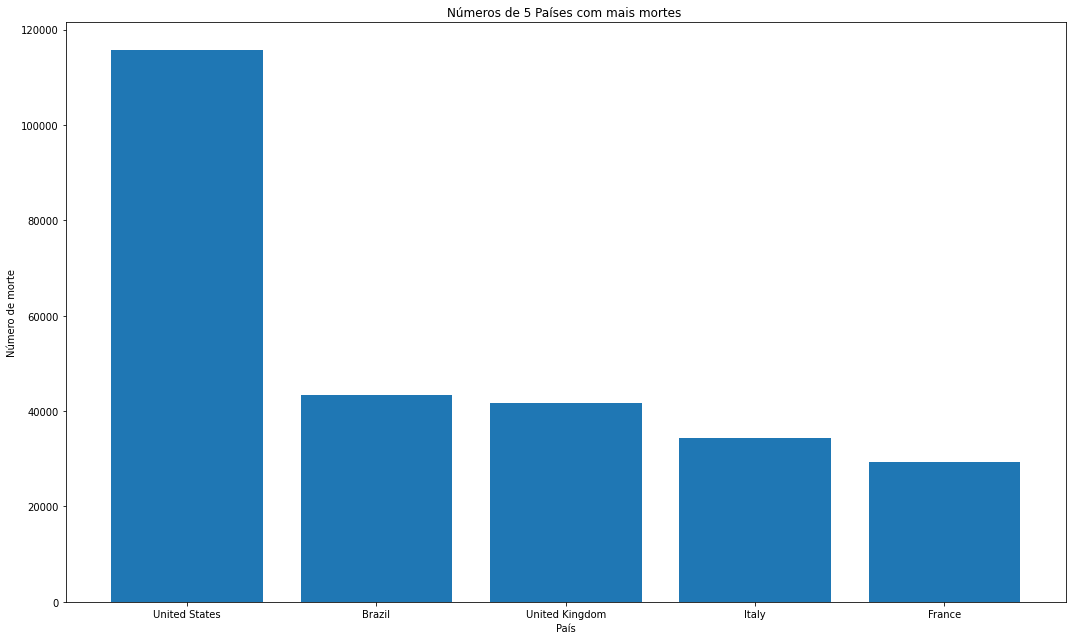

In [27]:
# gráfico de barras para total de mortes

top_5_total_deaths = df.loc[df.date == '2020-06-15', ['location', 'total_deaths']].sort_values(by="total_deaths", ascending=False)[1:6]

fig, ax = plt.subplots(figsize=(15,9))

ax.bar('location', 'total_deaths', data=top_5_total_deaths)
ax.set_title("Números de 5 Países com mais mortes ")
ax.set_xlabel('País')
ax.set_ylabel('Número de morte')
plt.tight_layout()

# Como o vírus está progredindo?
Uma das maiores preocupações das organizações de saúde é a progressão do número de casos e mortes no mundo.

Uma das melhores formas de visualizarmos a evolução ao longo do tempo, é o gráfico de linhas. Por isso, vamos plotar um gráfico de linha para demonstrar e evolução de mortes no mundo.

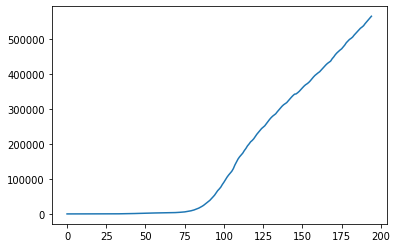

In [58]:
# gráfico de linha para mortes no mundo
df.loc[df.location== "World", "total_deaths"].reset_index(drop=True).plot();
# Eixo x = Dias
# Eixo Y = Mortes



### Análise Exploratória para o Brasil

Agora que já temos uma noção dos acontecimentos no mundo, vamos focar nos acontecimentos no Brasil.

In [32]:
# Criar uma cópia do DataFrame apenas com o Brasil
df_brasil =df.loc[df.location =="Brazil"].copy()

df_brasil.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
3826,BRA,South America,Brazil,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
3827,BRA,South America,Brazil,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
3828,BRA,South America,Brazil,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
3829,BRA,South America,Brazil,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
3830,BRA,South America,Brazil,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88


In [33]:
df_brasil.date.max()

Timestamp('2020-07-12 00:00:00')

Acima, verificamos que nosso dataset inclui datas desde **31-12-2019** até **12
-07-2020**.

Vamos verificar quando foram identificados o primeiro caso e a primeira morte no Brasil.

In [35]:
# Identificar quando foi registrada a primeira morte no Brasil
df_brasil.loc[df_brasil['new_deaths'] != 0.0].head(1)

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
3904,BRA,South America,Brazil,2020-03-18,291.0,57.0,1.0,1.0,1.369,0.268,0.005,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.65,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88


In [43]:
# Identificar quantos dias demorou para registrarmos a primeira morte, considerando o primeiro caso de COVID-19 registrado.
# identificação do primeiro caso
df_brasil.loc[df_brasil ['new_cases'] !=0.0].head(1)


,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
3883,BRA,South America,Brazil,2020-02-26,1.0,1.0,0.0,0.0,0.005,0.005,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88


## Conclusão

Um detalhe extremamente importante a ser destacado é que esses dados são medidos diariamente, e esse conjunto de dados ficará desatualizado "rapidamente".

Entretanto, levando em consideração o contexto dos dados analisados, vale a pena destacar que:

* Os Estados Unidos estão disparados em relação aos casos e mortes.
* A evolução dos casos no Brasil está em crescimento avassalador.
* No geral, casos e mortes ainda estão crescendo.

Muitas outras análises podem ser retiradas desse conjunto de dados, mas com essa análise inicial já conseguimos retirar muitas informações.